<a href="https://colab.research.google.com/github/unknown-jun/Basic_of_Python/blob/master/08_01_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 리눅스설치 복습
1. cent 리눅스를 새로 생성합니다  
   가상환경 이미지 이름: cent os_2
2. 메모리 2048
3. 지금 새 가상하드 디스크 만들기
4. VDI 
5. 동적 할당
6. 파티션을 넉넉히 50GB 정도 잡는다.
6. 설정을 누른다. (위의 톱니바퀴 아이콘)
7. 시스템에서 포인팅 장치를 usb 태블릿으로 한다.
8. 저장소에 가서 광학 드라이브 옆에 있는 cd모양 아이콘을 클릭 후 디스크파일 선택을 누른다
9. 네트워크로 가서 네트워크 어댑터 사용하기를 체크하고 NAT으로 되어 있는지 확인
10. 어탭터2로 가서 네트워크 어댑터 사용하기를 체크하고 호스트 전용 어댑터를 클릭
11. 공유폴더로 가서 폴더와 플러스 아이콘을 선택한 후 공유폴더가 있는 디렉토리를 선택함
12. 자동마운트를 클릭
13. 언어선택에 english 선택
13. soft selection 에서 gnome을 선택하고 그 옆에 development tool을 선택
14. installation destination을 선택하고 파티션을 automatic으로 하 done
15. 설치가 끝났다면 root계정으로 들어간다
16. 위의 장치를 눌러 게스트 확장 CD 이미지 삽입 버튼을 누른다.
17. 장치에서 클립보드 공유, 드래그앤 드랍의 설정을 양방향으로 잡는다.
18.  sudo usermod -a -G vboxsf scott(사용자 계정)
19.  sudo chown -R scott:users /media/sf_data/ (사용자 계정, 사용자가 지정한 공유폴더)

# 1. 하둡이란 무엇인가?
- 대용량 데이터를 분산 처리할 수 있는 자바 기반의 오픈 소스 프레임워크
- 하둡은 분산 파일 시스템인 HDFS(Hadoop Distributed File System)에 데이터를 저장
- 분산처리시스템인 맵리듀스를 이용해 데이터를 처리함

- 현업에서 데이터 분석가들이 하둡을 어떻게 활용하는가?  
        데이터의 종류 1. 정형화된 데이터: emp와 같이 column과 row로 이루어진 RDMS에 저장되는 테이블 형태의 데이터
                      2. 반정형화된 데이터: 웹로그와 sns 데이터
                      3. 비정형화된 데이터: 동영상이나 이미지 데이터
                    
|RDBMS|비RDBMS|
|:--:|:--:|
|Oracle|하둡|
|MS SQL|스칼라|
|My SQL|
|Maria DB|
|Postgre SQL|

## 하둡의 장점
1. 무료
2. 분산처리가 가능하다.
3. 저렴한 구축비용과 비용대비 빠른 데이터 처리

    ~~~
    여러대의 노드(컴퓨터)를 묶어서 마치 하나의 서버처럼 보이게 함
    여러 노드의 자원을 이용해서 데이터를 처리하기 때문에 처리하는 속도가 아주 빠른 장점이 있다.

    예1: 
    우리반 컴퓨터( 한대의 메모리가 8Gb ) 30대를 다 묶어서 분산처리 파일 시스템을 구성했으면
    마치 30대의 컴퓨터를 하나의 컴퓨터처럼 보이게 할 수 잇다
    이로써 240기가의 메모리를 사용할 수 있게 되고 30개의 cpu를 다 사용할 수 있게 됌

    예2:
    한대의 서버로 1 Tb의 데이터를 처리하는데 걸리는 시간이 2시간 반이 걸린다고 하면 
    하둡으로 여대의 서버를 병렬로 묶어서 작업하면 2분 내에 데이터를 읽을 수 있다.

    예3: 
    2008년 뉴욕 타임즈는 130년 분량의 신문기사 1100만 페이지를 하둡을 이용해서 하루만에 pdf로 변환을 하였음
    이때 든 비용이 200만원 밖에 소모되었음
    만약 하둡이 아닌 일반 서버로 처리했다면 14년이 걸렸을 것으로 예상했다.

    이걸 지원하는 게 바로 하둡
    ~~~

## 하둡의 단점
1. 무료다 보니 유지보수가 어렵다
2. 네임노드가 다운되면 고가용성이 지원이 안된다.

    ~~~
    분산처리 시스템에서 네임노드가 가장 앞에서 지원함
    이 네임노드가 메타 데이터를 저장하고 있다.
    메타 데이터는 emp.csv에 대한 백업 정보와 주소(위치)정보를 기억함
    네임노드가 다운이 되면 모든 백업 정보와 주소 정보를 읽어 들이지 못함
    ~~~

3. 한번 저장된 파일은 수정할 수가 없다
 
    ~~~
    기존 데이터에 append는 가능하지만 update가 되지 않는다.
    emp.csv의 내용을 변경하려면 emp.csv를 직접 열어서 수정해야 함
    ~~~

- 라이나 생명 데이터 분석가
    1. 하둡에 고객 데이터를 저장하고 나이대 별로 분리해서 csv파일을 생성한다.
    2. 나이대 별로 분리한 csv 파일 데이터를 가지고 군집 분석
    3. 나이대 별로 분리한 csv 파일 데이터를 가지고 연관 분석

- 아프리카 tv 데이터 분석가
    1. 채팅 데이터를 다 하둡에 저장
    2. 특정 단어를 자주 사용하는 채팅방의 형태를 분석
    3. 머신러닝을 사용해서 가공한 채팅 데이터를 학습시키고 특정 단어를 사용하는 사람은 불건전 대화를 이끌 가능성이 높다는 것을 미리 예측을 하고 채팅방을 폐쇄시킨다.

- 야후의 경우 약 5만대의 서버(컴퓨터)를 연결해서 하둡을 운영하고 있고
- 페이스북은 약 1만대 이상의 하둡 클러스터를 이용하고 있다.

- 하둡이 나온 배경지식

~~~
구글에서 쌓여지는 수많은 빅데이터들을 처음에는 RDBMS에 입력하고 데이터를 저장하려는 시도를 했으나 
너무 데이터가 많아서 실패를 하고 자체적으로 빅데이터를 저장할 기술을 개발을 했다.
대외적으로 이 기술에 대한 논문을 하나 발표했다.
그 논문을 더그 커팅(하둡을 만든 이)이라는 분이 읽고 자바로 구현했다.
자바를 몰라도 하둡의 데이터를 쉽게 다룰 수 있도록 NoSQL을 제공해서 SQL과 같은 언어로 쉽게 빅데이터를 다룰 수 있게 되었다.
~~~

- NoSQL (Not Only SQL)

~~~
NoSQL은 전통적인 RDBMS와 다른 DBMS를 지칭하기 위한 용어
예:
1. Hive: SQL과 같은 방식
2. Pig : SQL과 다름
3. Mongo DB: SQL과 다름
~~~



~~~
DW 서버 (Data Warehouse)
Oracle, 하둡, mySQL, Maria db, 스칼라
부서: DW 부서, DATA MART
DBA(Data base 관리자), DW 개발자, 데이터 분석가
~~~

## 하둡 생태계 시스템

~~~
빅데이터 분석  --> R, Python 등을 이용해서 분석  
      ↑ 
빅데이터 저장  --> HBase, MongoDB, cassandra, CouchDB  
      ↑ 
분산 처리 지원 --> Hive, Pig, Sqoop, Zookeeper  
      ↑ 
분산 배치 처리 --> 하둡( hadoop ) -Map, Reduce  
      ↑  
분산 파일 관리 --> 하둡( hadoop )- HDFS  
~~~

- 하이브(hive) 사용예
~~~
hive> 
select count(*) from emp;   --> SQL을 java로 자동 변환하여 데이터 출력
~~~

## 하둡의 주요 배포판

1. Cloudera 업체에서 나온 CDH
2. Hortonworks에서 나온 HDP
3. 아마존에서 나온 EMR ( Elastic Mapreduce)
4. Hstreaming에서 나온 Hstreaming

- 하둡 홈페이지  
https://hadoop.apache.org/

## 하둡 설치의 큰 그림

 1. java설치: 하둡이 자바로 만들어져 있어서 자바를 설치해야 함
 2. keygen 생성: 여러 노드들을 묶어서 마치 하나의 컴퓨터처럼 보이게 하는 게 하둡의 목표이므로 다른 컴퓨터로 접속할 때 패스워드를 물어보지 않아도 접속가능케 함
 3. 하둡 설치: 아주 간단한데 그냥 4개의 파일의 내용만 수정하면 끝임

## 하둡 설치에 앞서서 먼저 해야할 일
 1. 현업에서 처럼 리눅스 서버에 putty와 같은 접속 프로그램을 이용해서 접속하도록 설정을 함
 

문제 200. putty로 cent OS리눅스 서버에 접속한 화면을 캡쳐하기

문제 201. /home/scott 디렉토리로 이동해서 test100 이라는 디렉토리를 생성하시오
~~~
$ cd
$ pwd
$ mkdir test100
~~~

문제 202. 리눅스 명령어로 1부터 5까지의 숫자를 출력하는 쉘스크립트를 작성하고 아래와 같이 실행하시오
~~~
$ sh a.sh
1
2
3
4
5
~~~

~~~
$ vi a.sh
for i in {1:5}
do
echo $i
done
~~~

문제 203. 공유폴더로 접근하시오
~~~
$ cd /media/sf_data
$ ls -l emp.txt
~~~

문제 204. 공유폴더에 있는 emp.txt를 /home/scott 밑으로 복사하시오
~~~
$ cp emp.txt /home/scott
~~~

문제 205. 다시 집(/home/scott)으로 와서 emp.txt를 cat으로 열어보시오
~~~
$ cd
$ pwd
$ cat emp.txt
~~~

문제 206. 공유폴더에 있는 dept.txt도 /home/scott 밑으로 복사하고 cat으로 열어보시오
~~~
$ cp /media/sf_Linux/dept.txt .
                    설명: 점(.)이 의미하는 것은 현재 디렉토리라는 뜻
~~~

문제 207. 위의 3개의 파일을 공유폴더에 저장하시오

문제 208. 리눅스를 새로 다시 복제하고 키젠까지 다시 설치하시오

### Mac OS에서 ssh 들어가기

~~~
ssh(secure shell):
- 보호된 원격 로그인, 원격 데이터 통신에 사용되는 프로토콜
- 패킷을 암호화하여 전송하기 때문에 도청, 위변조 차단이 가능
- 서버/클라이언트 구조로 동작하며 보통 TCP 포트 22 사용

여기서는 원격 접속을 할 것이므로 ssh 클라이언트 프로그램이 해당된다.
~~~

~~~
OpenSSH 패키지

- SSH 프로토콜을 사용하는 공개 소스 프로그램 패키지
- 서버 프로그램인 sshd와 클라이언트 프로그램들을 모두 포함한다.
~~~

1. OpenSSH 설치 확인 방법


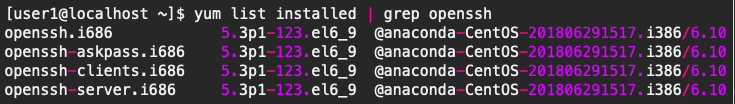

- yum list installed | grep openssh 명령으로 OpenSSH 패키지 설치 확인이 가능하다.   
- 위와 유사한 결과가 나오면 패키지가 이미 설치된 것이다.
~~~  
yum -y install openssh    # OpenSSH 패키지 설치  
yum -y update openssh     # OpenSSH 패키지 업데이트
~~~
- OpenSSH 패키지를 설치하거나 이미 설치된 패키지를 업데이트 하려면 각각 위와 같이 입력한다.

2. SSH 서버 실행  
- 가상 머신의 리눅스로 원격 접속하기 위해서는 SSH 서버 프로그램인 sshd 데몬이 실행중인 상태여야 한다. 
- sshd 실행 상태는 service sshd status 명령으로 확인할 수 있다. 
- OpenSSH 패키지가 이미 설치되어 있다면 기본적으로 부팅 시 자동으로 실행되도록 설정되어 있어 sshd 데몬도 실행 중일 가능성이 높다.

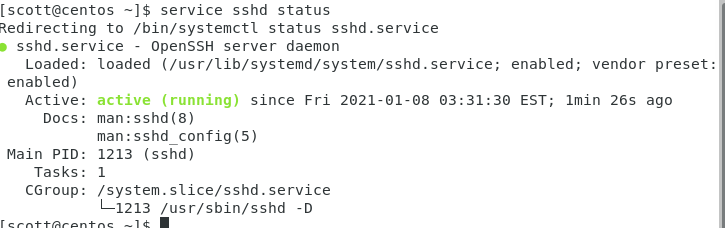

- 실행중이지 않으면 service sshd start 명령으로 실행한다. 
- 부팅 시 sshd가 자동으로 실행되게 하려면 chkconfig sshd on 명령을 입력한다.

~~~
service sshd start    # sshd 실행
chkconfig sshd on     # 부팅 시 sshd 자동 실행 
~~~

3. 방화벽 설정
- SSH가 사용하는 22번 포트를 허용하도록 방화벽 설정이 되어있어야 한다. 
- iptables -nL 명령을 입력하여 다음의 ACCEPT...tcp dpt:22처럼 INPUT 체인에 tcp 목적지 포트 22가 허용 설정이 되어있는지 확인한다.
- 이때 사용자 계정은 root여야 한다.

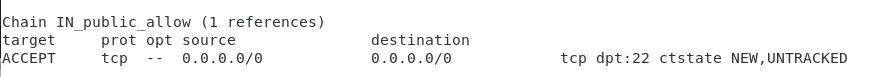

- 그렇지 않으면 iptables -A INPUT -p tcp -m tcp --dport 22 -j ACCEPT 를 입력하여 SSH 접속 허용 설정을 하고 service iptables save를 입력하여 저장한다.

~~~
[user1@localhost ~]$ iptables -A INPUT -p tcp -m tcp --dport 22 -j ACCEPT
[user1@localhost ~]$ service iptables save
~~~

4. 호스트 allow 설정
- 리눅스 머신의 TCP/IP 서비스를 이용할 수 있는 호스트를 설정한다.

- VirtualBox의 [파일] - [호스트 네트워크 관리자] 메뉴를 클릭한다.

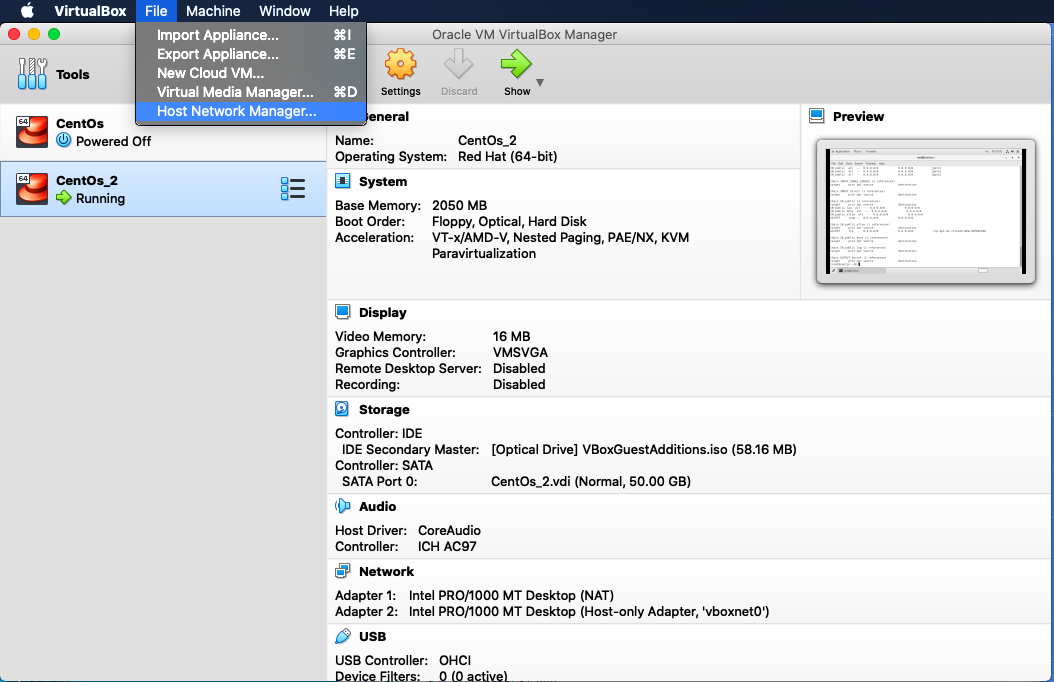

- 호스트 네트워크 관리자 창에서 VirtualBox Host-Only Ehternet Adapter의 IP주소를 확인한다.

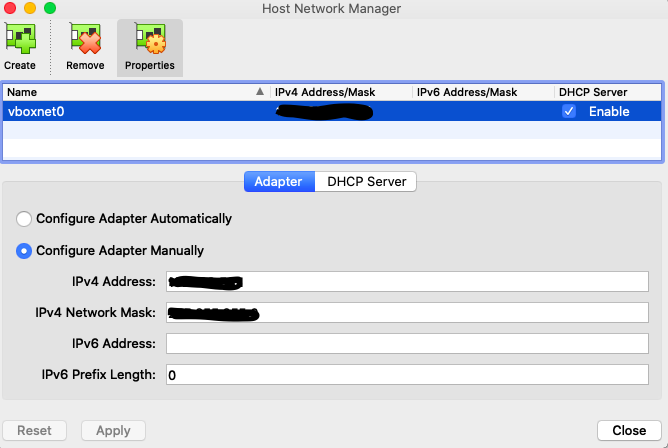

- IPv4 address에 나온 주소를 적는다.

- /etc/hosts.allow 파일을 편집하기 위해 vi /etc/hosts.allow를 입력한다.

~~~
[user1@localhost ~]$ vi /etc/hosts.allow
~~~

- 위와 같이 sshd: 뒤에 VirtualBox Host-Only Ehternet Adapter의 IP주소를 입력하고 저장한다.

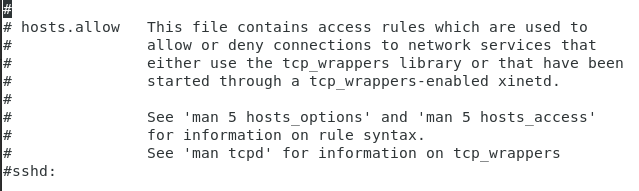

- ifconfig에서 나온 결과의 대한 해석  
ifcfg-enp0s3  : 은 인터넷 연결을 위한 네트워크  
ifcfg-enp0s8  : 은 다른 서버가 내 서버에 접속을 하기 위해 ip주소를 셋팅하는 네트워크

- 리눅스 터미널 창에 hostname -I을 입력해 확인한 후 3개 아이피를 이용해 맥터미널 창에서 ssh를 접속할 수 있다.
- ssh scott@ip주소를 입력하면 리눅스 서버로 들어갈 수 있다.


## 하둡 설치


항상 접속할 때는 scott 으로 접속하고 root 에서 작업할 때는 
scott 으로 접속한 상태에서 터미널 창에서 su - 로 스위치 유져하여 작업합니다. 

1. 하둡을 설치하기 위해서 필요한 파일

 아래의 설치 파일을 공유폴더인 c 드라이브 밑에 data 밑에 둡니다. 

  1. jdk-7u60-linux-i586.gz
  2. hadoop-1.2.1.tar.gz
  3. protobuf-2.5.0.tar.gz

 위의 3개의 파일을 바탕화면에 home 폴더에 카피 합니다. 